In [1]:
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix

C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = pd.read_csv('traindata.csv')
data.head()

C:\Users\tabme\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBS,CUSTOMERID,CITY,STATE,ZIP,REGION,CURRENTBALANCE,CONTRACT_FEE,TOT_OPEN_AMT,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,ACTIVATED_YEAR,ACTIVATED_MONTH,AGE_RANGE,CREDIT_APPROVAL,RENEWAL_YEAR,RENEWAL_MONTH,CONTACT_METHOD,RATE_PLAN,CHURN
0,1,498696,MONTGOMERY,AL,36117,E_S_CENTRAL,0.00,0.0,0.00,53.51,53.51,5,1999,MAR,30S,None,1999,MAR,OTHER,BASIC,0
1,2,498778,PRATTVILLE,AL,36066,E_S_CENTRAL,273.05,50.0,0.00,566.87,566.87,3,1999,MAR,50S,Manual Review,1999,JUN,OTHER,UNLIMITED,1
2,3,498775,SYLACAUGA,AL,35151,E_S_CENTRAL,37.59,20.0,37.59,174.27,136.68,5,1999,MAR,20S,3 Approved Services,1999,MAR,FAMILY SALE,200 MINUTE,0
3,4,498757,ECLECTIC,AL,36024,E_S_CENTRAL,0.00,0.0,0.00,66.24,66.24,5,1999,MAR,30S,1 Approved Services,1999,MAR,OTHER,BASIC,0
4,5,498752,ANNISTON,AL,36206,E_S_CENTRAL,27.05,20.0,27.05,169.62,142.57,5,1999,MAR,30S,5 Approved Services,1999,MAR,OTHER,200 MINUTE,0


In [3]:
data.shape

(371933, 21)

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
laen_x = LabelEncoder()

In [5]:
data.columns

Index(['OBS', 'CUSTOMERID', 'CITY', 'STATE', 'ZIP', 'REGION', 'CURRENTBALANCE', 'CONTRACT_FEE', 'TOT_OPEN_AMT', 'TOT_INVOICE_AMT', 'TOT_PAID_AMT', 'NUM_INVOICES', 'ACTIVATED_YEAR', 'ACTIVATED_MONTH', 'AGE_RANGE', 'CREDIT_APPROVAL', 'RENEWAL_YEAR', 'RENEWAL_MONTH', 'CONTACT_METHOD', 'RATE_PLAN', 'CHURN'], dtype='object')

In [6]:
data = data.drop('OBS',axis=1)
data = data.drop('CUSTOMERID',axis=1)
data = data.drop('ZIP',axis=1)
data = data.drop('ACTIVATED_MONTH',axis=1)
data = data.drop('RENEWAL_MONTH',axis=1)
data = data.drop('CITY',axis=1)
data = data.drop('STATE',axis=1)
data = data.drop('RENEWAL_YEAR',axis=1)
data = data.drop('ACTIVATED_YEAR',axis=1)

In [7]:
data.head()

,REGION,CURRENTBALANCE,CONTRACT_FEE,TOT_OPEN_AMT,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,AGE_RANGE,CREDIT_APPROVAL,CONTACT_METHOD,RATE_PLAN,CHURN
0,E_S_CENTRAL,0.00,0.0,0.00,53.51,53.51,5,30S,None,OTHER,BASIC,0
1,E_S_CENTRAL,273.05,50.0,0.00,566.87,566.87,3,50S,Manual Review,OTHER,UNLIMITED,1
2,E_S_CENTRAL,37.59,20.0,37.59,174.27,136.68,5,20S,3 Approved Services,FAMILY SALE,200 MINUTE,0
3,E_S_CENTRAL,0.00,0.0,0.00,66.24,66.24,5,30S,1 Approved Services,OTHER,BASIC,0
4,E_S_CENTRAL,27.05,20.0,27.05,169.62,142.57,5,30S,5 Approved Services,OTHER,200 MINUTE,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371933 entries, 0 to 371932
Data columns (total 12 columns):
REGION             371933 non-null object
CURRENTBALANCE     371933 non-null float64
CONTRACT_FEE       371933 non-null float64
TOT_OPEN_AMT       371933 non-null float64
TOT_INVOICE_AMT    371933 non-null float64
TOT_PAID_AMT       371933 non-null float64
NUM_INVOICES       371933 non-null int64
AGE_RANGE          371933 non-null object
CREDIT_APPROVAL    371933 non-null object
CONTACT_METHOD     371933 non-null object
RATE_PLAN          371933 non-null object
CHURN              371933 non-null int64
dtypes: float64(5), int64(2), object(5)
memory usage: 34.1+ MB


In [9]:
data.shape

(371933, 12)

In [10]:
X = data.iloc[:,:-1].values
y = data.iloc[:,11].values

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
laen_x = LabelEncoder()
# X[:,0] = laen_x.fit_transform(X[:,0])
X[:,0] = laen_x.fit_transform(X[:,0])
X[:,7] = laen_x.fit_transform(X[:,7])
X[:,9] = laen_x.fit_transform(X[:,9])
X[:,10] = laen_x.fit_transform(X[:,10])
X[:,8] = laen_x.fit_transform(X[:,8])

In [12]:
ohe = OneHotEncoder(categorical_features = [0,7,8,9,10])
X = ohe.fit_transform(X).toarray()

In [13]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.transform(X_test)

# Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
print("Accuracy on training data = %f" % clf.score(X_train, y_train))
print("Accuracy on test data = %f" % clf.score(X_test, y_test))

Accuracy on training data = 0.980329
Accuracy on test data = 0.829863


In [17]:
prob_churn = clf.predict_proba(X_test)[:,1] # Probabilities to churn

In [18]:
# Predict churn given a probabilistic threshold t
def predict_with_threshold(est, X, t = 0.5):
    return (est.predict_proba(X)[:,1] >= t).astype(int)

# Get the min churn cost per customer, and the associated probability threshold
def churn_cost_per_customer_and_threshold(est, X, Y):
    min_cost, optimal_t = np.max(cmc), 0
    
    for t in np.arange(0, 1.01, 0.01):
        Y_predicted = predict_with_threshold(est, X, t)
        ccpc = calculate_ccpc(Y_predicted, Y)
        
        if ccpc < min_cost:
            min_cost = ccpc
            optimal_t = t
    
    return min_cost, optimal_t

# Only the churn cost per customer
def churn_cost_per_customer(est, X, Y):
    return churn_cost_per_customer_and_threshold(est, X, Y)[0]

# Scorer used in GridSearchCV that minimizes the churn_cost_per_customer (=> maximize the inverse)
def scorer_based_on_churn_cost_per_customer(est, X, Y):
    return 1.0 / churn_cost_per_customer(est, X, Y)

In [19]:
thresholds = np.arange(0, 1.01, 0.01) # The prob. thresholds
scores = []

for t in thresholds:
    Y_predicted = predict_with_threshold(clf, X_test, t)
    right_predictions = (Y_predicted == y_test)
    scores.append( np.mean(right_predictions.astype(int)) )

In [20]:
# Getting the threshold that maximizes the score
max_score, max_score_threshold = np.max(scores), thresholds[np.argmax(scores)]
print("Max accuracy occurs at probability threshold %0.2f, with score of %0.2f" % (max_score_threshold, max_score))

Max accuracy occurs at probability threshold 0.66, with score of 0.83


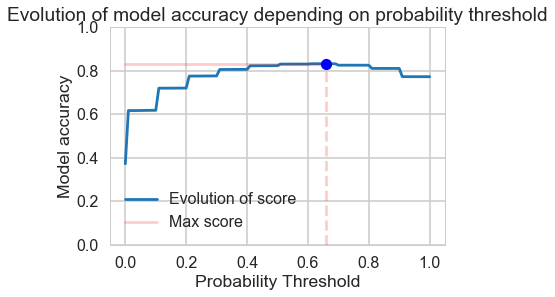

In [21]:
plt.plot(thresholds, scores, label = 'Evolution of score')
plt.plot([0, max_score_threshold], [max_score, max_score], color = 'r', alpha = 0.2, label = 'Max score')
plt.plot([max_score_threshold, max_score_threshold], [0, max_score], 'r--', alpha = 0.2)
plt.plot([max_score_threshold], [max_score], 'bo')
plt.legend()
plt.ylim(0, 1)
plt.xlabel('Probability Threshold')
plt.ylabel('Model accuracy')
plt.title('Evolution of model accuracy depending on probability threshold')
plt.show()

In [22]:
y_ran = clf.predict(X_test)

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.8183651120242557


In [24]:
RANDOM_STATE = 123

In [25]:
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

In [26]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
from collections import OrderedDict
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

In [27]:
# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably me

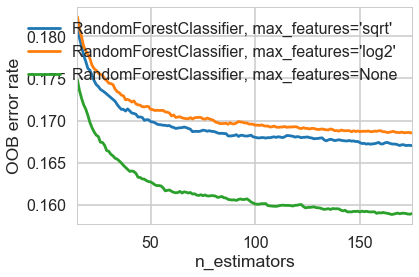

In [28]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [29]:
import numpy as np
np.random.seed(10)

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

In [30]:
n_estimator = 10
# Unsupervised transformation based on totally random trees
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, rt_lm)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

In [31]:
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)

In [32]:
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

In [33]:
# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

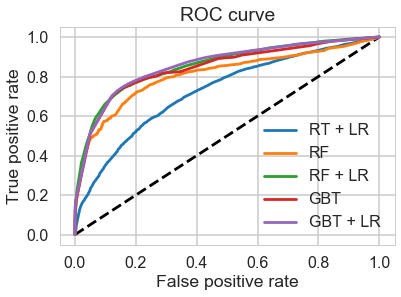

In [34]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

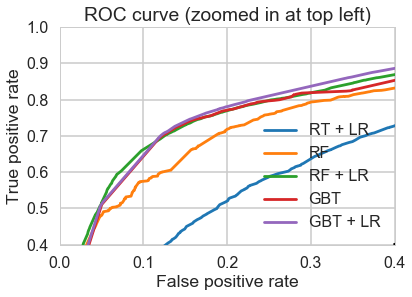

In [35]:
plt.figure(2)
plt.xlim(0, 0.4)
plt.ylim(0.4, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBT')
plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

# Neural network

In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.45508184
Iteration 2, loss = 0.42895107
Iteration 3, loss = 0.41726496
Iteration 4, loss = 0.41031876
Iteration 5, loss = 0.40651643
Iteration 6, loss = 0.40397199
Iteration 7, loss = 0.40226648
Iteration 8, loss = 0.40000597
Iteration 9, loss = 0.39875261
Iteration 10, loss = 0.39785430
Iteration 11, loss = 0.39651072
Iteration 12, loss = 0.39586192
Iteration 13, loss = 0.39538017
Iteration 14, loss = 0.39518034
Iteration 15, loss = 0.39422194
Iteration 16, loss = 0.39432899
Iteration 17, loss = 0.39383049
Iteration 18, loss = 0.39263577
Iteration 19, loss = 0.39239147
Iteration 20, loss = 0.39151093


C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=20, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [47]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.835857
Test set score: 0.834312


In [49]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

In [50]:
labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

In [60]:
from sklearn.preprocessing import MinMaxScaler
def plot_on_dataset(X, y, ax):
    # plot learning for each learning strategy
    X = MinMaxScaler().fit_transform(X)
    mlps = []

    max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
            plt.plot(mlp.loss_curve_, label=label, **args)

training: constant learning-rate
Training set score: 0.825486
Training set loss: 0.421454
training: constant with momentum
Training set score: 0.825378
Training set loss: 0.422018
training: constant with Nesterov's momentum
Training set score: 0.825378
Training set loss: 0.417291
training: inv-scaling learning-rate
Training set score: 0.740450
Training set loss: 0.543167
training: inv-scaling with momentum
Training set score: 0.794553
Training set loss: 0.470035
training: inv-scaling with Nesterov's momentum
Training set score: 0.776330
Training set loss: 0.494604
training: adam
Training set score: 0.821191
Training set loss: 0.415732


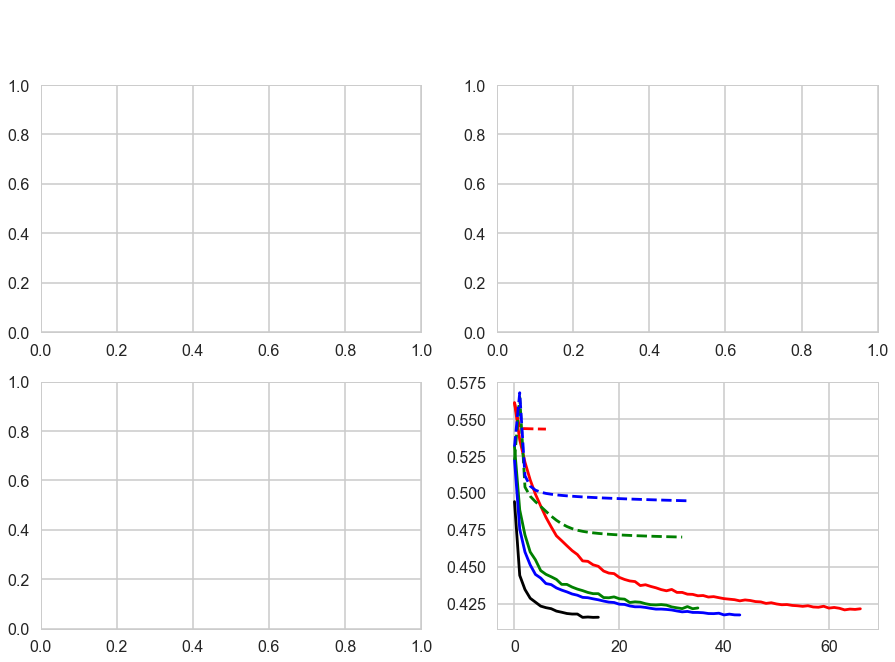

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plot_on_dataset(X_train, y_train, ax=axes)
fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()

# Non-linear SVM

In [63]:
from sklearn import svm
clf = svm.NuSVC()

In [64]:
clf.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [89]:
y_svmpred = clf.predict(X_test)

In [121]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

C:\Users\tabme\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [148773, 371933]

In [118]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
from sklearn.metrics import roc_curve, auc
n_classes = y_tr.shape[1]
n_samples, n_features = X.shape
# Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_te.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

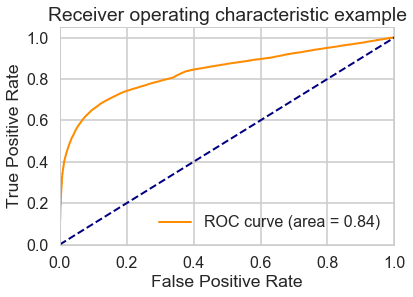

In [123]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Receiver operating characteristic to multi-class

# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves

In [125]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=6)

In [126]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

In [ ]:
for train, test in cv.split(X, y):
    probas_ = clf.fit(X_train, y_train).predict(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()